<a href="https://colab.research.google.com/github/peterjsadowski/ics235/blob/master/tutorials/02_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree for Treachery Prediction

Train a scikit learn decision tree classifier named 'model' on the following data set. The data file consists of the class (0 or 1) in the first column, followed by 10 features. 

https://raw.githubusercontent.com/peterjsadowski/ics235/master/data/treachery_train.csv

Tune and regularize your model so that it generalizes well to new data.



Training model...
Trained model has depth: 13

Train model accuracy: 0.83!
Train AUROC: 1.00
Test model accuracy: 0.80!
Test AUROC: 0.62

Feature ranking:
1. Feature 9 (0.244652)
2. Feature 8 (0.193832)
3. Feature 5 (0.145415)
4. Feature 6 (0.138897)
5. Feature 3 (0.077879)
6. Feature 2 (0.056771)
7. Feature 0 (0.050225)
8. Feature 4 (0.044433)
9. Feature 7 (0.031260)
10. Feature 1 (0.016635)


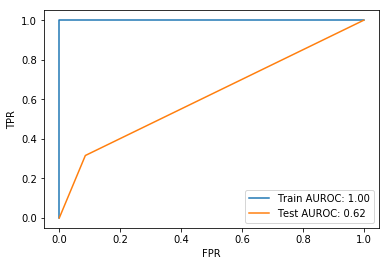

In [21]:
import urllib.request
from scipy.io import arff
import numpy as np
import sklearn
import sklearn.tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Download data.
url = 'https://raw.githubusercontent.com/peterjsadowski/ics235/master/data/treachery_train.csv'
filename = './treachery_train.csv'
response = urllib.request.urlretrieve(url, filename)
X = np.loadtxt(fname='treachery_train.csv')
Y = X[:,0:1]
X = X[:,1:]

# Split data set into train and test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Instantiate DecisionTreeClassifier object.
model = sklearn.tree.DecisionTreeClassifier(random_state=1, 
                                            criterion='gini', 
                                            max_depth=None, 
                                            min_samples_split=2,
                                            min_samples_leaf=1,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.,
                                            )

print('Training model...')
model.fit(X_train, Y_train)
print(f'Trained model has depth: {model.get_depth()}')
print('')

# Evaluate performance on training set.
accuracy_train = np.mean(model.predict(X_train) == Y_train)
print(f'Train model accuracy: {accuracy_train:0.2f}!')

Yhat_train = model.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_train, Yhat_train, pos_label=1)
auc_train = sklearn.metrics.auc(fpr, tpr)
print(f'Train AUROC: {auc_train:0.2f}')

plt.plot(fpr, tpr, label=f'Train AUROC: {auc_train:0.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')

# Evaluate performance on test set.
accuracy_test = np.mean(model.predict(X_test) == Y_test)
print(f'Test model accuracy: {accuracy_test:0.2f}!')

Yhat_test = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, Yhat_test, pos_label=1)
auc_test = sklearn.metrics.auc(fpr, tpr)
print(f'Test AUROC: {auc_test:0.2f}')

plt.plot(fpr, tpr, label=f'Test AUROC: {auc_test:0.2f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# Plot the "feature importance" ranking.
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


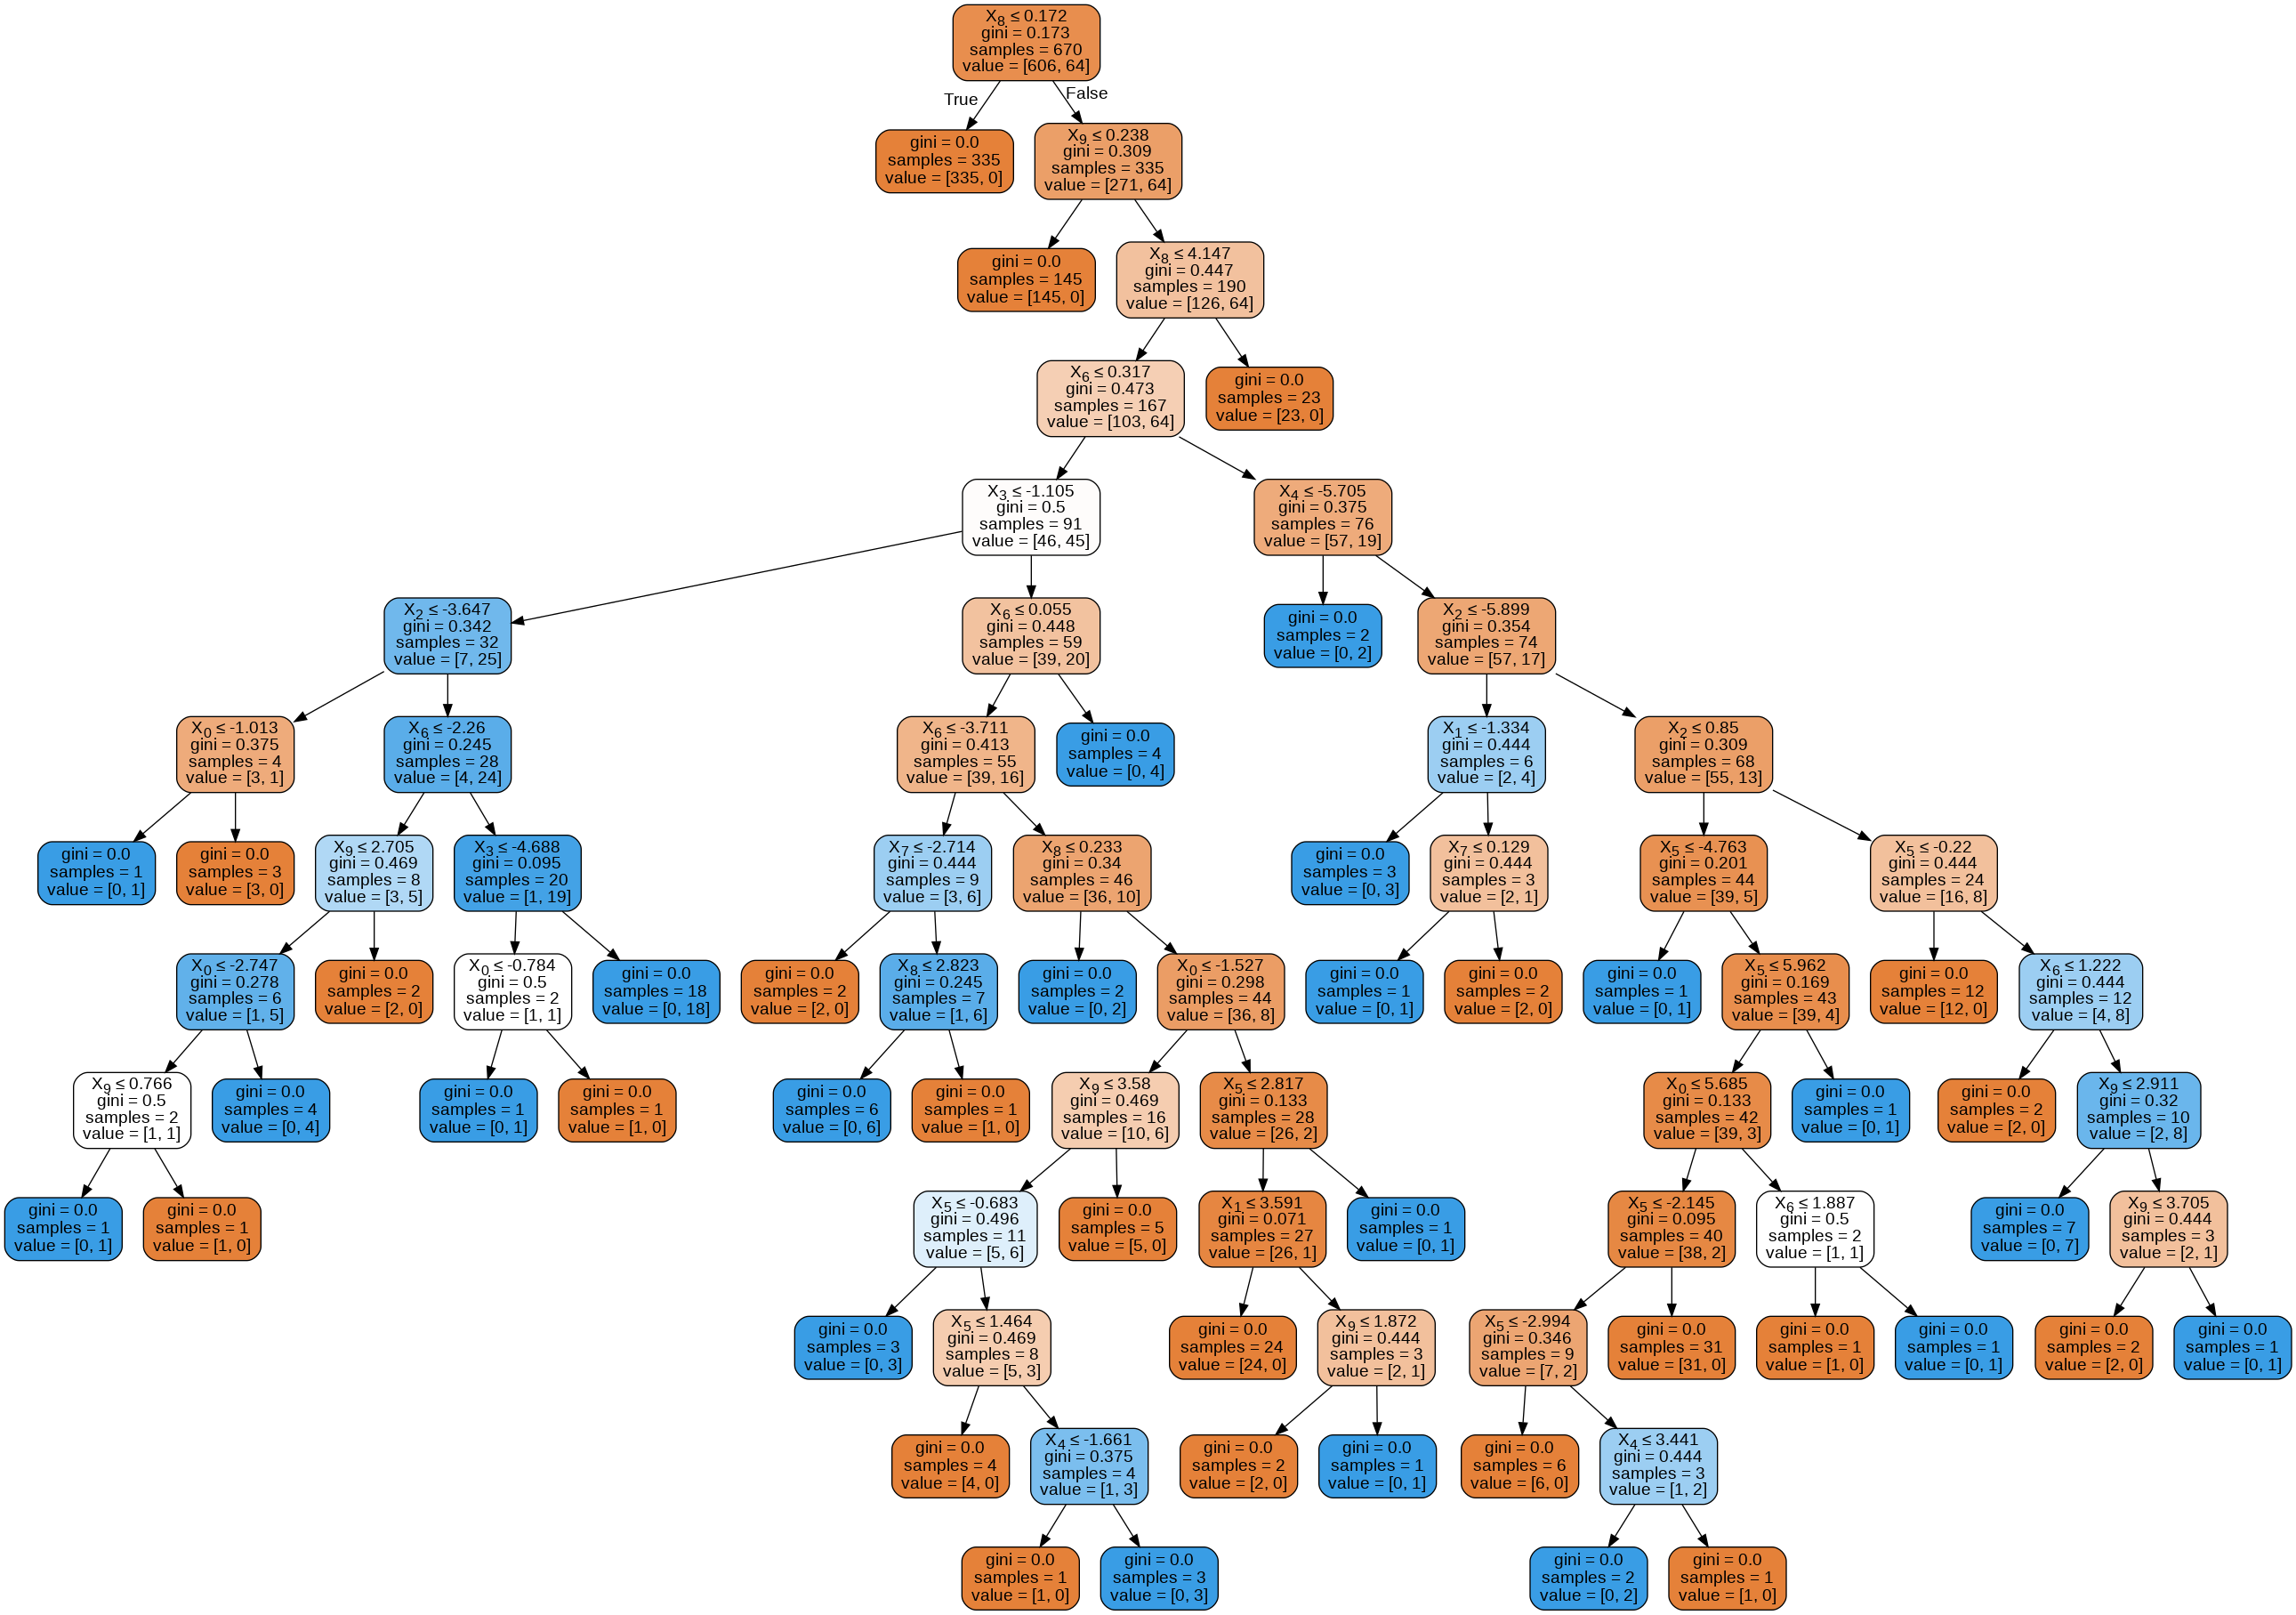

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image, display
from sklearn.tree import export_graphviz
import pydotplus

def visualize(tree_model):
    # Visualize decision tree.
    dot_data = StringIO()
    export_graphviz(tree_model, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
    
visualize(model)